In [13]:
from numpy import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from pprint import pprint

In [14]:
# https://pybonacci.org/2012/10/15/el-salto-de-felix-baumgartner-en-python/

# https://www.20minutos.es/deportes/noticia/felix-baumgartner-traje-ansiedad-creer-salto-1781818/0/
m = 115 # kg

# https://enjoy.es/magazine/2022/10/01/historia-del-deporte-extremo-10-anos-del-salto-de-felix-baumgartner/
Vmax = 1357.6 # km/h

# https://es.wikipedia.org/wiki/Red_Bull_Stratos
Ttotal = 260 # s

y0 = 39068 # m

CD = 0.4

A = 1.0 # m**2

g = -9.81 # m/s**2

def rho(h): # h en Km
    rho_0 = 1.225 # g/dm**3
    h0 = 0 # km
    H = 8.5 # km
    return rho_0 * exp( - (h - h0) / H ) # g/dm**3

pprint(Vmax / 3.6)

377.1111111111111


In [15]:
t = 0
y = y0 # Height
v = 0 # Speed

dt = 0.001 # s

datos_y = []
datos_v = []
datos_t = []

while True:
    #pprint(f"t={t}, y={y}, v={v}")

    y_prev = y
    v_prev = v

    D = 1 / 2 * rho(y_prev / 1000) * v_prev**2 * CD * A

    F = g * m + D
    a = F / m
    v = v_prev + a * dt
    y = y_prev + v_prev * dt
    t += dt

    if y < 0:
        break

    datos_y.append(y)
    datos_v.append(abs(v))
    datos_t.append(t)


353.56606925620554


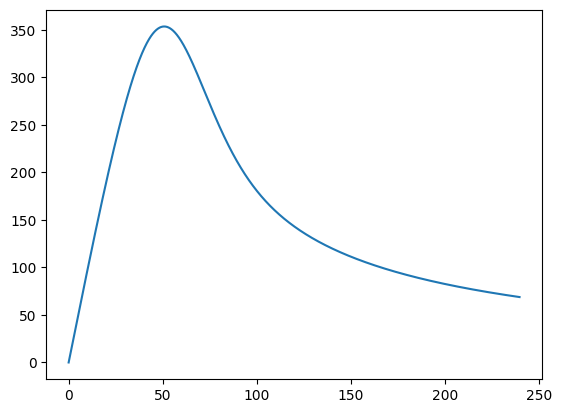

In [16]:
f = plt.figure()
plt.plot(datos_t, datos_v)
pprint(max(datos_v))

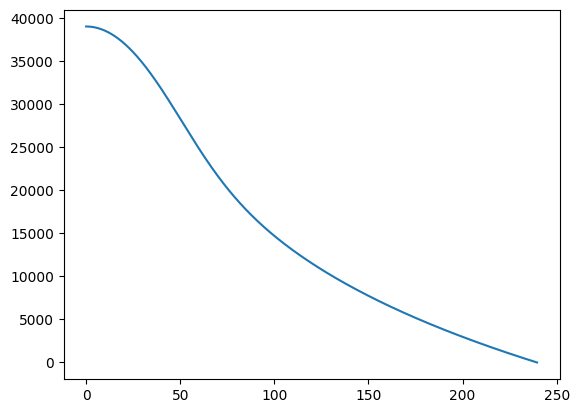

In [17]:
f = plt.figure()
plt.plot(datos_t, datos_y)

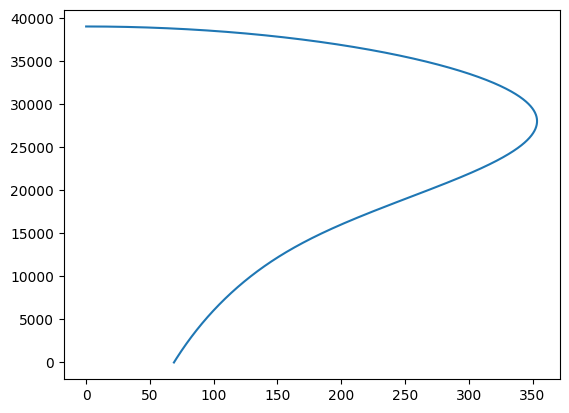

In [18]:
f = plt.figure()
plt.plot(datos_v, datos_y)

In [19]:
pprint(datos_v[-1] * 3.6) # Valocidad de aterizaje en Km/h

# Aterrizaje en paracaidas: 250 km/h
# https://everent.es/cosas-que-debes-saber-antes-de-saltar-en-paracaidas/


247.83928332118262


Usando numpy.solve_ivp

F = -g*m + D
D = 1/2 * rho(y / 1000) * v**2 * CD * A = D(y, v)

y''(t) = F/m

Condiciones iniciales: y(0) = y0,  y'(0) = v0

El estado en cada instante está representado por el vector X(t) = [ x0, x1 ] = [ y(t), v(t) ]

Las Ecuaciones Diferenciales que rigen el proceso son:

x0'(t) = y'(t) = x1(t)
x1'(t) = y''(t) = -g + D(y, v) / m = D(x0, x1) / m - g

In [20]:
from numpy import * 
from scipy.integrate import solve_ivp


In [21]:
# https://www.20minutos.es/deportes/noticia/felix-baumgartner-traje-ansiedad-creer-salto-1781818/0/
m = 115 # kg

# https://enjoy.es/magazine/2022/10/01/historia-del-deporte-extremo-10-anos-del-salto-de-felix-baumgartner/
Vmax = 1357.6 # km/h

# https://es.wikipedia.org/wiki/Red_Bull_Stratos
Ttotal = 260 # s

y0 = 39068 # m
v0 = 0 # m/s

CD = 0.4

A = 1.0 # m**2

g = -9.81 # m/s**2

def rho(h): # h en Km, results in g/l = g/dm**3 = kg/m**3
    rho_0 = 1.225 # g/dm**3 = kg/m**3
    h0 = 0 # km
    H = 8.5 # km
    return rho_0 * exp( - (h - h0) / H ) # g/dm**3

In [22]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
# https://stackoverflow.com/questions/59877836/an-implementation-of-solve-ivp-ode-solver
# https://stackoverflow.com/questions/61429505/is-it-possible-to-access-the-solution-array-at-every-time-step-using-solve-ivp

def diff_eq(t, X):
    D = 1 / 2 * rho(X[0] / 1000) * X[1]**2 * CD * A
    return [ X[1], D / m + g ]

def hit_ground(t, y):
    return y[0]

hit_ground.terminal = True

hit_ground.direction = -1

t_eval = linspace(0, 1000, 1001)

sol = solve_ivp(diff_eq, [0, 1000], [y0, v0], t_eval=t_eval, events=hit_ground)

print(sol.t_events)

[array([239.59041776])]


In [23]:
pprint(sol.t.shape)
pprint(sol.y.shape)

(240,)
(2, 240)


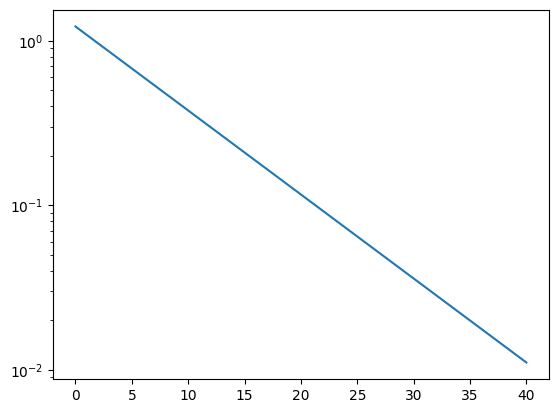

In [24]:
f = plt.figure()
hs = linspace(0, 40, 400)
plt.plot(hs, vectorize(rho)(hs))
#plt.xscale("log")
plt.yscale("log")

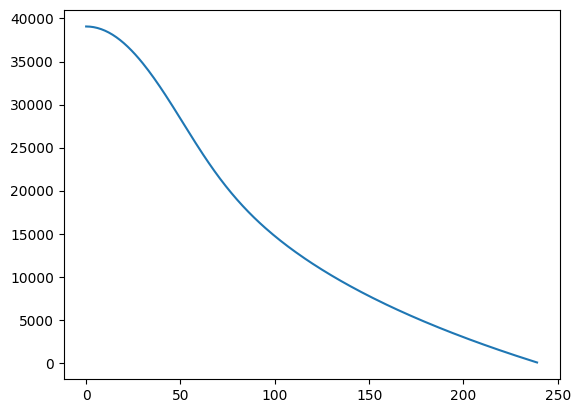

In [25]:
f = plt.figure()
plt.plot(sol.t, sol.y[0])

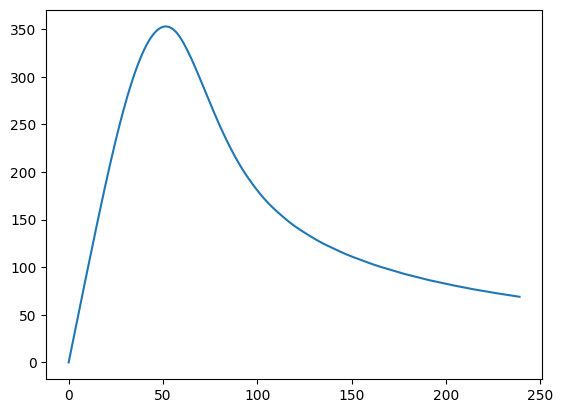

In [26]:
f = plt.figure()
plt.plot(sol.t, abs(sol.y[1]))

In [27]:
# https://www.tiempo.com/noticias/ciencia/el-modelo-atmosfera-teorica-isa-para-estudiar-el-comportamiento-de-la-atmosfera-real.html

def temper(h): # h en Km, results in Celsius
    t0 = 20 # https://es.weatherspark.com/m/3855/10/Tiempo-promedio-en-octubre-en-Nuevo-M%C3%A9xico-M%C3%A9xico
    if h <= 11:
        return t0 - 6.5 * h
    if h <= 20:
        return t0 - 6.5 * 11
    if h <= 32:
        return t0 - 6.5 * 11 + (h - 20) * 1.0
    return t0 - 6.5 * 11 + (32 - 20) * 1.0 + (h - 32) * 2.8


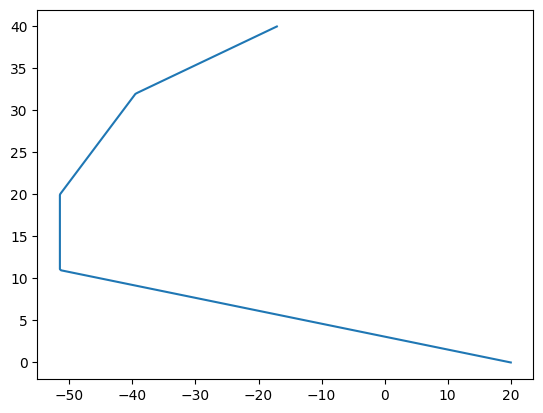

In [28]:
heights = linspace(0, 40, 300)
tempers = vectorize(temper)(heights)
f = plt.figure()
plt.plot(tempers, heights)

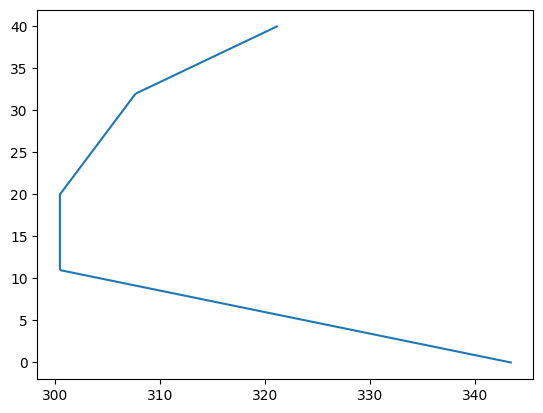

In [29]:
# http://hyperphysics.phy-astr.gsu.edu/hbasees/Sound/souspe3.html
v_sonido = 331.4 + 0.6 * tempers
f = plt.figure()
plt.plot(v_sonido, heights)

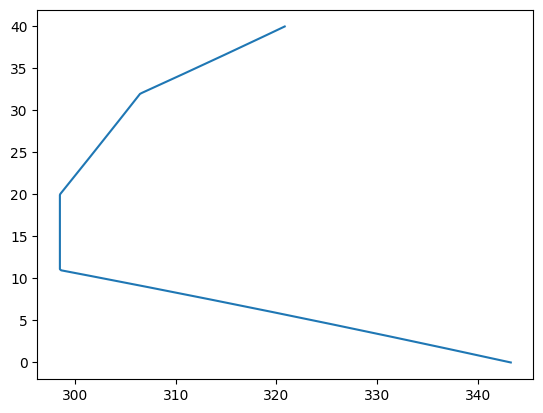

In [30]:
v_sonido = 20.05 * sqrt(tempers + 273.15)
f = plt.figure()
plt.plot(v_sonido, heights)

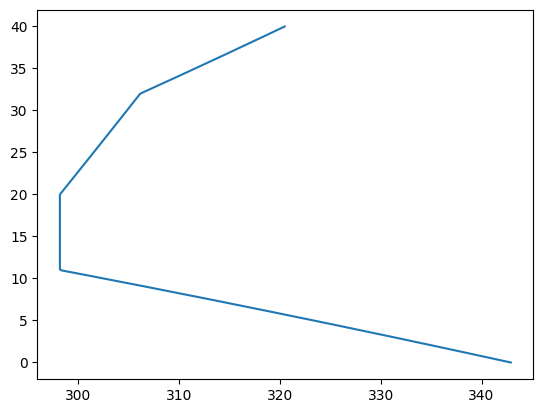

In [31]:
# https://openstax.org/books/f%C3%ADsica-universitaria-volumen-1/pages/17-2-velocidad-del-sonido

v_sonido = 331 * sqrt((tempers + 273.15) / 273.15)
f = plt.figure()
plt.plot(v_sonido, heights)

36.0 69.0


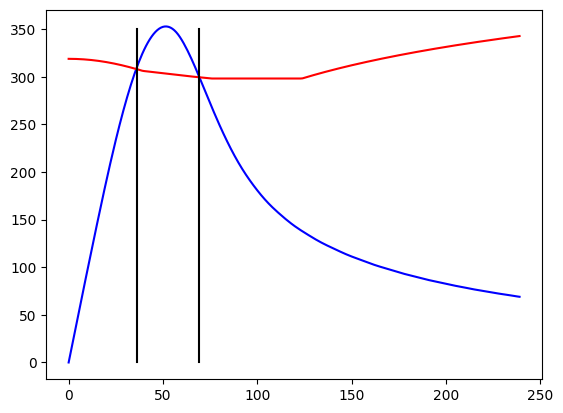

In [49]:
t_eval = linspace(0, 1000, 1001)

def hit_ground(t, y):
    return y[0]
hit_ground.terminal = True
hit_ground.direction = -1

def speed_of_sound(t, y):
    temp = temper(y[0] / 1000)
    vsonido = 331 * sqrt((temp + 273.15) / 273.15)
    return y[1] - vsonido

sol = solve_ivp(diff_eq, [0, 1000], [y0, v0], t_eval=t_eval, events=( hit_ground, speed_of_sound ) )

f = plt.figure()
plt.plot(sol.t, abs(sol.y[1]), 'b')

tempers = vectorize(temper)(sol.y[0] / 1000)
v_sonido = 331 * sqrt((tempers + 273.15) / 273.15)
plt.plot(sol.t, v_sonido, 'r')

tsupera = sol.t[ where(abs(sol.y[1]) >= v_sonido) ]
tiempo0 = min(tsupera)
tiempo1 = max(tsupera)
print(tiempo0, tiempo1)
plt.plot([tiempo0, tiempo0], [0, 350], 'k')
plt.plot([tiempo1, tiempo1], [0, 350], 'k')


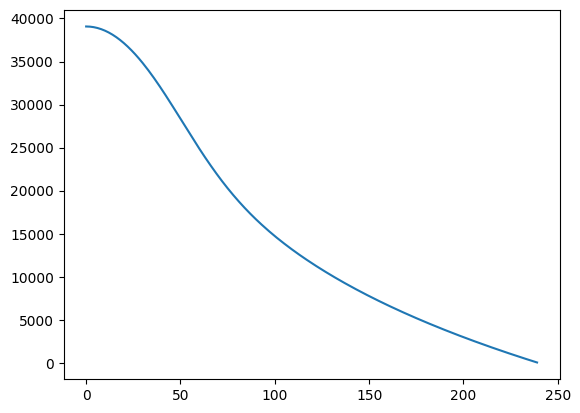

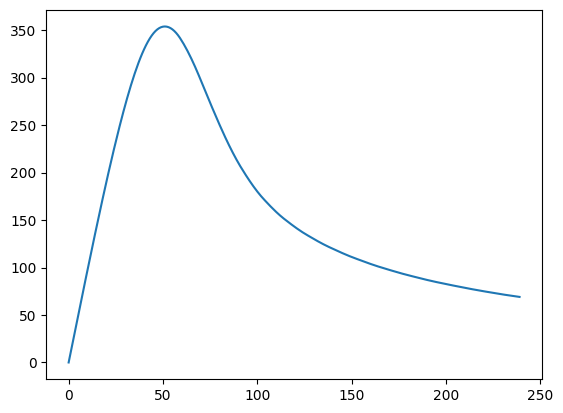

In [14]:
sol = solve_ivp(diff_eq, [0, 1000], [y0, v0], t_eval=linspace(0, 1000, 1001), events=hit_ground, method='RK23')
f = plt.figure()
plt.plot(sol.t, sol.y[0])
f = plt.figure()
plt.plot(sol.t, abs(sol.y[1]))

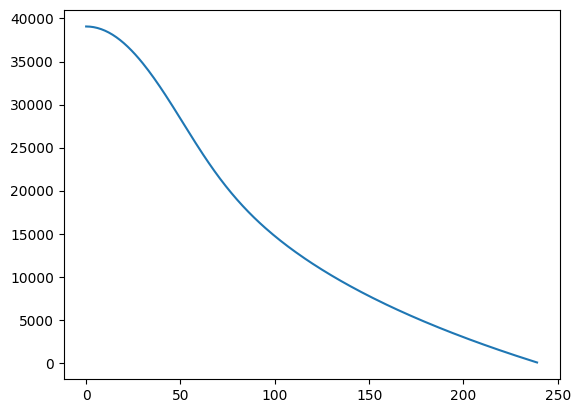

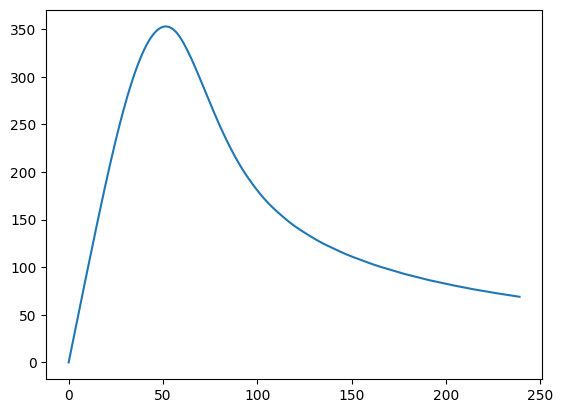

In [15]:
sol = solve_ivp(diff_eq, [0, 1000], [y0, v0], t_eval=linspace(0, 1000, 1001), events=hit_ground, method='RK45')
f = plt.figure()
plt.plot(sol.t, sol.y[0])
f = plt.figure()
plt.plot(sol.t, abs(sol.y[1]))

In [25]:
from numpy import * 
from scipy.integrate import solve_ivp
from aerocalc import std_atm


In [26]:
# https://www.20minutos.es/deportes/noticia/felix-baumgartner-traje-ansiedad-creer-salto-1781818/0/
m = 115 # kg

# https://enjoy.es/magazine/2022/10/01/historia-del-deporte-extremo-10-anos-del-salto-de-felix-baumgartner/
Vmax = 1357.6 # km/h

# https://es.wikipedia.org/wiki/Red_Bull_Stratos
Ttotal = 260 # s

y0 = 39068 # m
v0 = 0 # m/s

CD = 0.4

A = 1.0 # m**2

g = -9.81 # m/s**2

def rho_simple(h): # h en Km, results in g/l = g/dm**3 = kg/m**3
    rho_0 = 1.225 # g/dm**3 = kg/m**3
    h0 = 0 # km
    H = 8.5 # km
    return rho_0 * exp( - (h - h0) / H ) # g/dm**3

def rho(h): # h en Km, results in kg/l = kg/dm**3
    return std_atm.alt2density(h * 1000, alt_units='m', density_units='kg/m**3')

def diff_eq(t, X):
    D = 1 / 2 * rho(X[0] / 1000) * X[1]**2 * CD * A
    return [ X[1], D / m + g ]

def hit_ground(t, y):
    return y[0]

hit_ground.terminal = True

hit_ground.direction = -1

t_eval = linspace(0, 1000, 1001)

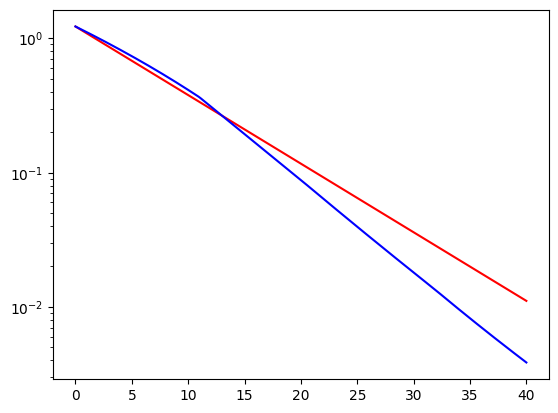

In [27]:
f = plt.figure()
hs = linspace(0, 40, 400)

plt.plot(hs, vectorize(rho_simple)(hs), 'r')
#plt.xscale("log")
plt.yscale("log")

plt.plot(hs, vectorize(rho)(hs), 'b')
#plt.xscale("log")
plt.yscale("log")

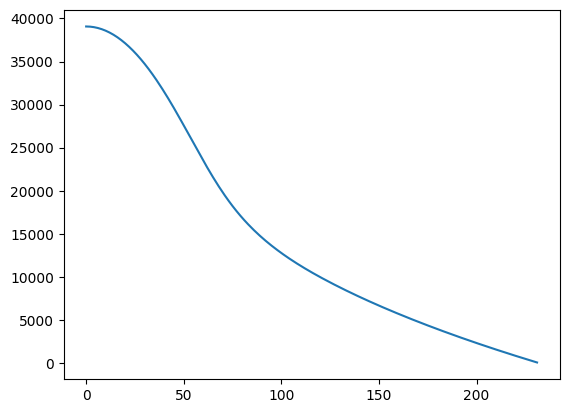

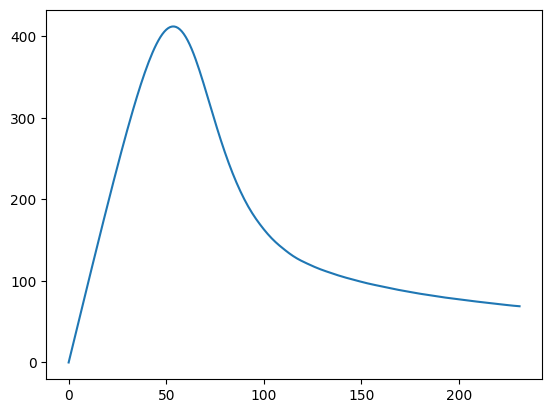

In [28]:
sol = solve_ivp(diff_eq, [0, 1000], [y0, v0], t_eval=linspace(0, 1000, 1001), events=hit_ground)

f = plt.figure()
plt.plot(sol.t, sol.y[0])
f = plt.figure()
plt.plot(sol.t, abs(sol.y[1]))

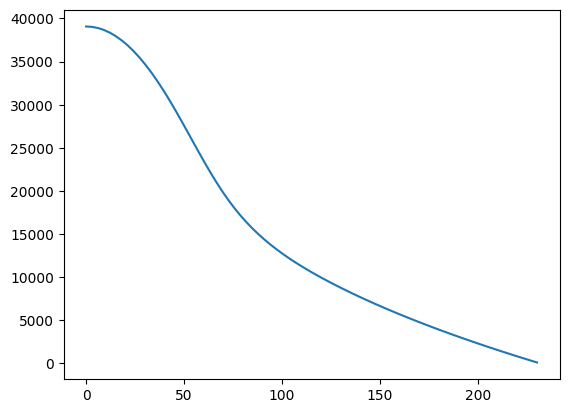

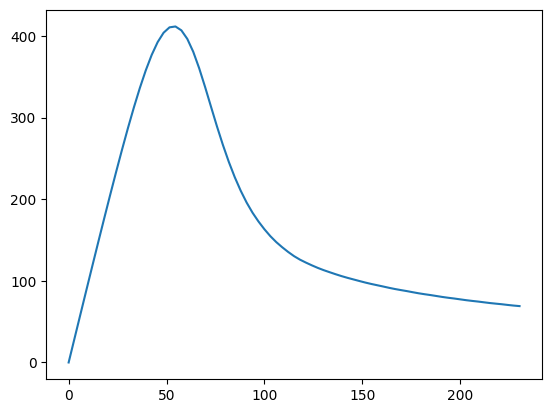

In [68]:
sol = solve_ivp(diff_eq, [0, 1000], [y0, v0], t_eval=linspace(0, 300, 100), events=hit_ground)

f = plt.figure()
plt.plot(sol.t, sol.y[0])
f = plt.figure()
plt.plot(sol.t, abs(sol.y[1]))

In [69]:
max(sol.t)

230.3030303030303

In [70]:
sol.t

array([  0.        ,   3.03030303,   6.06060606,   9.09090909,
        12.12121212,  15.15151515,  18.18181818,  21.21212121,
        24.24242424,  27.27272727,  30.3030303 ,  33.33333333,
        36.36363636,  39.39393939,  42.42424242,  45.45454545,
        48.48484848,  51.51515152,  54.54545455,  57.57575758,
        60.60606061,  63.63636364,  66.66666667,  69.6969697 ,
        72.72727273,  75.75757576,  78.78787879,  81.81818182,
        84.84848485,  87.87878788,  90.90909091,  93.93939394,
        96.96969697, 100.        , 103.03030303, 106.06060606,
       109.09090909, 112.12121212, 115.15151515, 118.18181818,
       121.21212121, 124.24242424, 127.27272727, 130.3030303 ,
       133.33333333, 136.36363636, 139.39393939, 142.42424242,
       145.45454545, 148.48484848, 151.51515152, 154.54545455,
       157.57575758, 160.60606061, 163.63636364, 166.66666667,
       169.6969697 , 172.72727273, 175.75757576, 178.78787879,
       181.81818182, 184.84848485, 187.87878788, 190.90

In [71]:
sol.y

array([[ 3.90680000e+04,  3.90229645e+04,  3.88879190e+04,
         3.86630583e+04,  3.83487293e+04,  3.79454798e+04,
         3.74539405e+04,  3.68750989e+04,  3.62103709e+04,
         3.54616009e+04,  3.46311302e+04,  3.37221271e+04,
         3.27386553e+04,  3.16863859e+04,  3.05726719e+04,
         2.94065484e+04,  2.81979111e+04,  2.69606098e+04,
         2.57131041e+04,  2.44729231e+04,  2.32565323e+04,
         2.20793338e+04,  2.09559870e+04,  1.98986825e+04,
         1.89124542e+04,  1.79994831e+04,  1.71581496e+04,
         1.63827052e+04,  1.56670717e+04,  1.50047096e+04,
         1.43887701e+04,  1.38145498e+04,  1.32765381e+04,
         1.27682400e+04,  1.22859636e+04,  1.18282813e+04,
         1.13923887e+04,  1.09741098e+04,  1.05712009e+04,
         1.01831173e+04,  9.80795982e+03,  9.44276178e+03,
         9.08674677e+03,  8.74002597e+03,  8.40173265e+03,
         8.07046474e+03,  7.74615446e+03,  7.42887533e+03,
         7.11807572e+03,  6.81273690e+03,  6.51284302e+0

In [72]:
pprint(sol.t.shape)
pprint(sol.y.shape)

(77,)
(2, 77)


In [73]:
where(sol.t >= 10.1)[0][0]

4

In [74]:
where(sol.t <= 10.1)[0][-1]

3

In [79]:
i = where(sol.t <= 10.1)[0][-1]
pprint(i)
sol.y[:,i]

3


array([38663.05829213,   -88.99026696])

In [80]:
i = where(sol.t >= 10.1)[0][0]
pprint(i)
sol.y[:,i]

4


array([38348.72934576,  -118.4422122 ])

In [62]:
# https://openstax.org/books/f%C3%ADsica-universitaria-volumen-1/pages/17-2-velocidad-del-sonido
# https://pybonacci.org/2012/10/15/el-salto-de-felix-baumgartner-en-python/
# https://www.translatorscafe.com/unit-converter/es-ES/calculator/altitude/
# http://hyperphysics.phy-astr.gsu.edu/hbasees/Sound/souspe3.html
# https://www.tiempo.com/noticias/ciencia/el-modelo-atmosfera-teorica-isa-para-estudiar-el-comportamiento-de-la-atmosfera-real.html
# https://es.weatherspark.com/m/3855/10/Tiempo-promedio-en-octubre-en-Nuevo-M%C3%A9xico-M%C3%A9xico

In [63]:
from numpy import * 
from scipy.integrate import solve_ivp
from aerocalc import std_atm

# https://www.20minutos.es/deportes/noticia/felix-baumgartner-traje-ansiedad-creer-salto-1781818/0/
m = 115 # kg

# https://enjoy.es/magazine/2022/10/01/historia-del-deporte-extremo-10-anos-del-salto-de-felix-baumgartner/
Vmax = 1357.6 # km/h

# https://es.wikipedia.org/wiki/Red_Bull_Stratos
Ttotal = 260 # s

y0 = 39068 # m
v0 = 0 # m/s

CD = 0.4

A = 1.0 # m**2

g = -9.81 # m/s**2

def rho(h): # h en Km, results in kg/l = kg/dm**3
    return std_atm.alt2density(h * 1000, alt_units='m', density_units='kg/m**3')

def temper(h): # h en Km, results in Kelvin
    return std_atm.alt2temp(h * 1000, alt_units='m', temp_units='K')

def diff_eq(t, X):
    D = 1 / 2 * rho(X[0] / 1000) * X[1]**2 * CD * A
    return [ X[1], D / m + g ]

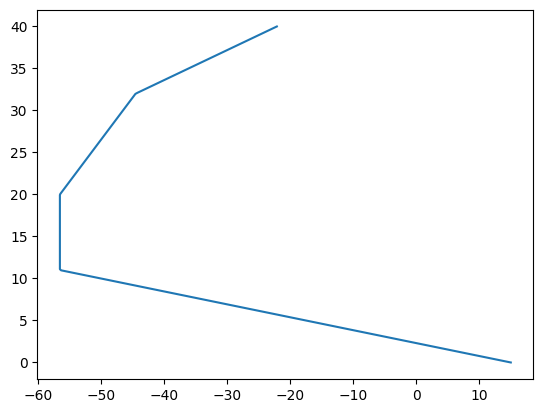

In [64]:
heights = linspace(0, 40, 300)
tempers = vectorize(temper)(heights) - 273.15
f = plt.figure()
plt.plot(tempers, heights)

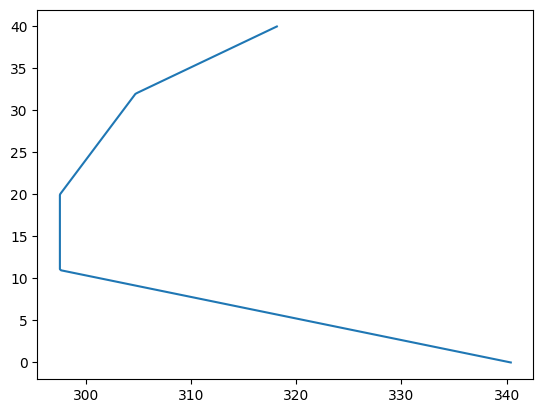

In [65]:
# http://hyperphysics.phy-astr.gsu.edu/hbasees/Sound/souspe3.html
v_sonido = 331.4 + 0.6 * tempers
f = plt.figure()
plt.plot(v_sonido, heights)

33.0 75.0


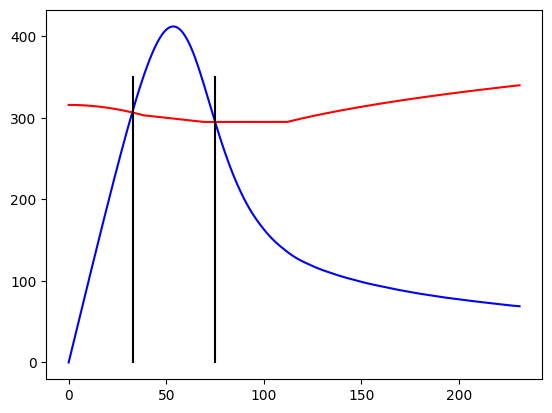

In [67]:
t_eval = linspace(0, 1000, 1001)

def hit_ground(t, y): # t in seconds, y = [ y in m, v in m/s ]
    return y[0]
hit_ground.terminal = True
hit_ground.direction = -1

def speed_of_sound(t, y): # t in seconds, y = [ y in m, v in m/s ]
    temp = temper(y[0] / 1000) # en Kelvin
    vsonido = 331 * sqrt(temp / 273.15)
    return y[1] - vsonido

sol = solve_ivp(diff_eq, [0, 1000], [y0, v0], t_eval=t_eval, events=( hit_ground, speed_of_sound ) )

f = plt.figure()
plt.plot(sol.t, abs(sol.y[1]), 'b')

tempers = vectorize(temper)(sol.y[0] / 1000)
v_sonido = 331 * sqrt(tempers / 273.15)
plt.plot(sol.t, v_sonido, 'r')

tsupera = sol.t[ where(abs(sol.y[1]) >= v_sonido) ]
tiempo0 = min(tsupera)
tiempo1 = max(tsupera)
print(tiempo0, tiempo1)
plt.plot([tiempo0, tiempo0], [0, 350], 'k')
plt.plot([tiempo1, tiempo1], [0, 350], 'k')